In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
catalog = pd.read_csv('/data/keeling/a/cristi/a/downscaled_data/LOCA2/LOCA2_catalog.csv')
catalog

,variable,model,scheme,experiment_id,time_period,path
0,pr,ACCESS-CM2,historical,r1i1p1f1,1950-2014,/data/cristi/a/cristi/downscaled_data/LOCA2/AC...
1,pr,ACCESS-CM2,historical,r2i1p1f1,1950-2014,/data/cristi/a/cristi/downscaled_data/LOCA2/AC...
2,pr,ACCESS-CM2,historical,r3i1p1f1,1950-2014,/data/cristi/a/cristi/downscaled_data/LOCA2/AC...
3,tasmax,ACCESS-CM2,historical,r1i1p1f1,1950-2014,/data/cristi/a/cristi/downscaled_data/LOCA2/AC...
4,tasmax,ACCESS-CM2,historical,r2i1p1f1,1950-2014,/data/cristi/a/cristi/downscaled_data/LOCA2/AC...
...,...,...,...,...,...,...
2308,tasmax,TaiESM1,ssp370,r1i1p1f1,2045-2074,/data/cristi/a/cristi/downscaled_data/LOCA2/Ta...
2309,tasmax,TaiESM1,ssp370,r1i1p1f1,2075-2100,/data/cristi/a/cristi/downscaled_data/LOCA2/Ta...
2310,tasmin,TaiESM1,ssp370,r1i1p1f1,2015-2044,/data/cristi/a/cristi/downscaled_data/LOCA2/Ta...
2311,tasmin,TaiESM1,ssp370,r1i1p1f1,2045-2074,/data/cristi/a/cristi/downscaled_data/LOCA2/Ta...


In [3]:
test=catalog.loc[(catalog['variable']=='pr') & (catalog['model']=='ACCESS-ESM1-5')]
test.experiment_id.unique()
for t in test.experiment_id.unique():
    print(t)

r1i1p1f1
r2i1p1f1
r3i1p1f1
r4i1p1f1
r5i1p1f1


In [5]:
test.loc[(test['experiment_id']=='r1i1p1f1')]['path'].to_list()

['/data/cristi/a/cristi/downscaled_data/LOCA2/ACCESS-ESM1-5/historical/pr.ACCESS-ESM1-5.historical.r1i1p1f1.1950-2014.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/ACCESS-ESM1-5/ssp245/pr.ACCESS-ESM1-5.ssp245.r1i1p1f1.2015-2044.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/ACCESS-ESM1-5/ssp245/pr.ACCESS-ESM1-5.ssp245.r1i1p1f1.2045-2074.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/ACCESS-ESM1-5/ssp245/pr.ACCESS-ESM1-5.ssp245.r1i1p1f1.2075-2100.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/ACCESS-ESM1-5/ssp370/pr.ACCESS-ESM1-5.ssp370.r1i1p1f1.2015-2044.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/ACCESS-ESM1-5/ssp370/pr.ACCESS-ESM1-5.ssp370.r1i1p1f1.2045-2074.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/ACCESS-ESM1-5/ssp370/pr.ACCESS-ESM1-5.ssp370.r1i1p1f1.2075-2100.LOCA_16thdeg_v20240915.c

In [7]:
path=catalog.loc[(catalog['variable']=='pr')&  
       (catalog['model']=='NorESM2-LM')&
       (catalog['scheme']=='historical')]['path'].to_list()
path

['/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/historical/pr.NorESM2-LM.historical.r1i1p1f1.1950-2014.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/historical/pr.NorESM2-LM.historical.r2i1p1f1.1950-2014.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/historical/pr.NorESM2-LM.historical.r3i1p1f1.1950-2014.LOCA_16thdeg_v20240915.cent.nc']

In [9]:
path=catalog.loc[(catalog['variable']=='pr')&  
       (catalog['model']=='NorESM2-LM')&
       (catalog['scheme']=='ssp245')]['path'].to_list()
path

['/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/ssp245/pr.NorESM2-LM.ssp245.r1i1p1f1.2015-2044.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/ssp245/pr.NorESM2-LM.ssp245.r1i1p1f1.2045-2074.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/ssp245/pr.NorESM2-LM.ssp245.r1i1p1f1.2075-2100.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/ssp245/pr.NorESM2-LM.ssp245.r2i1p1f1.2015-2044.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/ssp245/pr.NorESM2-LM.ssp245.r2i1p1f1.2045-2074.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/ssp245/pr.NorESM2-LM.ssp245.r2i1p1f1.2075-2100.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/LOCA2/NorESM2-LM/ssp245/pr.NorESM2-LM.ssp245.r3i1p1f1.2015-2044.LOCA_16thdeg_v20240915.cent.nc',
 '/data/cristi/a/cristi/downscaled_data/L

In [13]:
ds = xr.open_mfdataset(path,combine="by_coords")
ds

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 31411)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 07:51:10.710396 /net/mead24/data/LOCA2_CONUS...

In [2]:
def loca2_processing(scenario, variable, year_start, year_end):
    """
    
    Code to process LOCA2 Datasets for use over Illinois 
    
    
    Inputs:
     - scenario (str) - historical, ssp245, ssp370, ssp585
     - variable (str) - pr (Precipitation), tasmax (Maximum surface air temp.), tasmin (Minimum surface air temp.)
     - year_start (int) - First year you'd like to request
     - year_end (int) - Last year you'd like to request (inclusive)
    Outputs:
     - dataset (Dataset) - Contains data of given variable in Illinois within the designated 
    
    """
    # Locating the catalog
    catalog = pd.read_csv('/data/keeling/a/cristi/a/downscaled_data/LOCA2/LOCA2_catalog.csv')

    list_dataset_model = []
    for model in catalog.model.unique(): 
        print(model)
        # Looking to see if file exists for specified requirements
        cat_pull = catalog.loc[(catalog['variable']==variable) & (catalog['model']==model) & (catalog['scheme']==scenario)]
        # For each ensemble member (i.e. r1i1p1f1, r2i1p1f1, etc.)
        list_dataset_mem = []
        for mem in cat_pull.experiment_id.unique(): 
            mem_data = cat_pull.loc[(cat_pull['experiment_id']==mem)]['path'].to_list()
            if model=='CanESM5' and mem=='r3i1p1f1' and scenario=='ssp585' and variable=='pr':
                continue
            dataset_mem = xr.open_mfdataset(mem_data, combine="by_coords", use_cftime=True) # Opening datasets
            if variable not in dataset_mem.variables:
                continue
            # Assigning new time coordinates so that datasets from different models cooperate
            dataset_mem = dataset_mem.assign(time=pd.date_range(start=(str(dataset_mem.time[0].values).split(' ')[0]),
                                            freq='D',
                                            periods=len(dataset_mem.time))).sel(time=slice(str(year_start), str(year_end)))
            # Assigning ensemble member name
            dataset_mem['ens_mem'] = mem 
            list_dataset_mem.append(dataset_mem)
        if len(list_dataset_mem) == 0:
            continue
        # If only one dataset, assign model to that dataset
        elif len(list_dataset_mem) == 1: 
            dataset_model = list_dataset_mem[0]
        # If multiple, concatenate then assign    
        else: 
            dataset_model = xr.concat(list_dataset_mem, dim='ens_mem', coords='minimal', compat='override')
            dataset_model = dataset_model.mean('ens_mem') # Take mean over ensemble
        # Assign model name
        dataset_model['model'] = model
        # Picking out the Illinois region
        dataset_model = dataset_model.sel(lat=slice(36,43.5)).sel(lon=slice(267.2,274))
        list_dataset_model.append(dataset_model)
    # Appending all the datasets for each model together
    dataset = xr.concat(list_dataset_model, dim='model', coords='minimal', compat='override')
    return dataset

In [3]:
tasmin = loca2_processing('ssp245', 'tasmin', 2043, 2045)
tasmin

ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR
BCC-CSM2-MR
CESM2-LENS
CNRM-CM6-1-HR
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
EC-Earth3-Veg
EC-Earth3
FGOALS-g3
GFDL-CM4
GFDL-ESM4
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
KACE-1-0-G
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NorESM2-LM
NorESM2-MM
TaiESM1


<xarray.Dataset>
Dimensions:  (lon: 109, lat: 108, time: 1096, model: 24)
Coordinates:
  * lon      (lon) float64 267.2 267.3 267.3 267.4 ... 273.8 273.8 273.9 274.0
  * lat      (lat) float64 36.03 36.09 36.16 36.22 ... 42.53 42.59 42.66 42.72
  * time     (time) datetime64[ns] 2043-01-01 2043-01-02 ... 2045-12-31
  * model    (model) <U15 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'TaiESM1'
Data variables:
    tasmin   (model, time, lat, lon) float32 dask.array<chunksize=(1, 731, 108, 109), meta=np.ndarray>

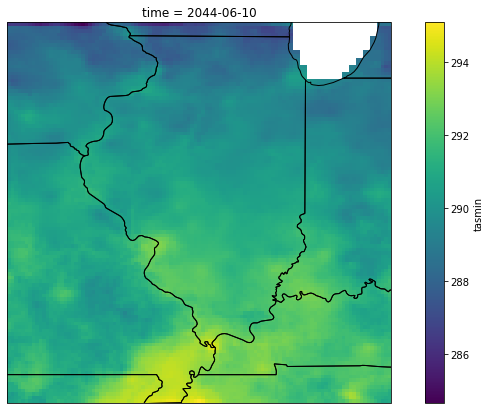

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
tasmin.tasmin.sel(time='2044-06-10').mean('model').plot()
ax.add_feature(cfeature.STATES)

In [10]:
tasmin_t = loca2_processing('ssp585', 'tasmin', 2043, 2045)
tasmin_t

ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR


/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_l

BCC-CSM2-MR
CESM2-LENS
CNRM-CM6-1-HR
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
EC-Earth3-Veg
EC-Earth3
FGOALS-g3
GFDL-CM4
GFDL-ESM4
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
KACE-1-0-G
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR


/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/data/keeling/a/mailes2/miniconda3/envs/climatemappingenv/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    

MRI-ESM2-0
NorESM2-LM
NorESM2-MM
TaiESM1


<xarray.Dataset>
Dimensions:  (lon: 109, lat: 108, time: 1096, model: 23)
Coordinates:
  * lon      (lon) float64 267.2 267.3 267.3 267.4 ... 273.8 273.8 273.9 274.0
  * lat      (lat) float64 36.03 36.09 36.16 36.22 ... 42.53 42.59 42.66 42.72
  * time     (time) datetime64[ns] 2043-01-01 2043-01-02 ... 2045-12-31
  * model    (model) <U15 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorESM2-MM'
Data variables:
    tasmin   (model, time, lat, lon) float32 dask.array<chunksize=(1, 731, 108, 109), meta=np.ndarray>